In [49]:
import pandas as pd
import numpy as np
import geopandas as gp

%matplotlib inline

In [2]:
df = pd.read_csv('traveltime_matrix_7-27.csv')

In [3]:
df.head()

,year,depart_time,origin,destination,walk_distance,travel_time
0,20190121,7:27:00,17031010300,17031010300,114.000000,84
1,20190121,7:27:00,17031010300,17031010400,1598.348398,1239
2,20190121,7:27:00,17031010300,17031010600,1401.995556,1072
3,20190121,7:27:00,17031010300,17031020100,2098.587789,1623
4,20190121,7:27:00,17031010300,17031280800,3791.000023,6172


In [4]:
len(df)

552206

In [52]:
rh = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/2019_Weekday_Ridehail.csv')

In [6]:
rh.head()

,Unnamed: 0,Pickup Census Tract,Dropoff Census Tract,MONTH,DAY,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,PRIVATE_TRIPS,SHARED_TRIPS,Trips Pooled,TOD
0,0,1.703101e+10,1.703101e+10,1.545455,14.681818,357.088636,1.089394,4.126894,0.606061,2.351250,7.084205,1.272727,0.409091,1.772727,1
1,1,1.703101e+10,1.703101e+10,1.482759,15.310345,285.902299,1.069540,3.735632,0.068966,2.387069,6.191667,0.896552,0.655172,1.862069,1
2,2,1.703101e+10,1.703101e+10,1.384615,16.000000,230.307692,0.576923,2.884615,0.076923,2.153846,5.115385,0.461538,0.692308,1.307692,1
3,3,1.703101e+10,1.703101e+10,1.500000,14.333333,206.625000,0.700000,3.333333,0.250000,2.125000,5.708333,0.916667,0.333333,1.416667,1
4,4,1.703101e+10,1.703101e+10,1.588235,10.764706,365.431373,1.462745,4.950980,0.490196,1.647059,7.088235,0.529412,0.588235,1.294118,1


In [7]:
len(rh)

767362

In [8]:
len(rh)-len(df)

215156

In [11]:
np.sqrt(len(rh)-len(df))

463.8491133978807

In [43]:
len(census[census['COUNTYFP'] == '031'])

1319

In [50]:
census = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Tracts/tl_2019_17_tract/tl_2019_17_tract.shp')

In [51]:
census['GEOID'] = census['GEOID'].astype(float)

In [58]:
points = rh['Pickup Census Tract'].append(rh['Dropoff Census Tract'])

points = points.drop_duplicates()

In [59]:
rh_origin = census[census['GEOID'].isin(points)]

In [60]:
rh_origin = rh_origin.drop_duplicates(subset = 'GEOID')

In [61]:
rh_origin.to_file('Ride-Hailing Origins.shp', driver = 'ESRI Shapefile')

In [62]:
len(rh_origin)

1023

In [36]:
df['origin'] = df['origin'].astype(str)
df['destination'] = df['destination'].astype(str)

In [24]:
origin = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'origin')

In [31]:
origin = origin.drop_duplicates?

In [32]:
origin = origin.drop_duplicates(subset = 'origin')

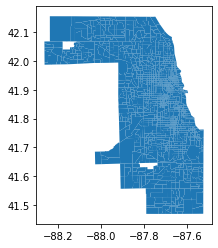

In [33]:
origin.plot()

In [34]:
origin.to_file('Origin_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')

In [37]:
dest = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'destination')

In [38]:
dest.to_file('Destination_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')